In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from collections import defaultdict
import networkx as nx

## Single Agent

In [2]:
# embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.7]
# agent_hilbert = Agent('agent_hilbert_space',
#                       'documents/HilbertSpaceMulti.pdf', 1, embedding_params, False)
# agent_hilbert.chat_bot.one_question("What is hilbert space?")

## Pack

In [3]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = 'chroma_db/agent_norbert'
viz_quant = "chroma_db/agent_quant"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5]
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_quant', viz_quant, 0, True],
    ['agent_norbert', norbet_cog, 0, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_ltoa is chroma_db/agent_ltoa

🔥  Conjuring up agent_snd  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_snd is chroma_db/agent_snd

🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_foundation is chroma_db/agent_foundation

🔥  Conjuring up agent_quant  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_quant is chroma_db/agent_quant

🔥  Conjuring up agent_norbert  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_norbert is chr

In [4]:
edges = test_pack.update_edges()
print(edges)

defaultdict(None, {'agent_ltoa': ['agent_ltoa', 'agent_foundation', 'agent_quant'], 'agent_snd': ['agent_snd', 'agent_foundation', 'agent_ltoa'], 'agent_foundation': ['agent_foundation', 'agent_quant', 'agent_norbert'], 'agent_quant': ['agent_quant', 'agent_foundation', 'agent_ltoa'], 'agent_norbert': ['agent_norbert', 'agent_foundation', 'agent_snd']})


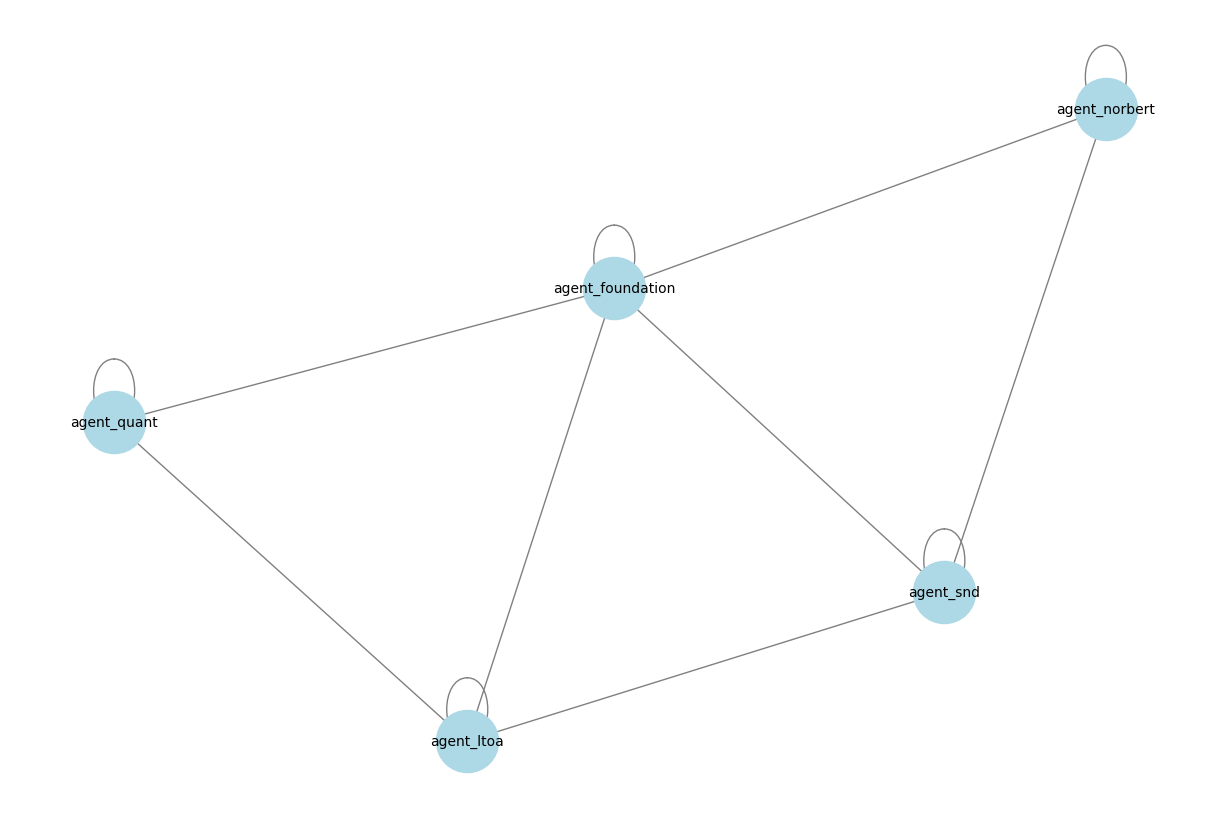

In [5]:
test_pack.graph()

## Metrics

In [6]:
metrics = ThoughtDiversity(test_pack)

In [7]:
# print(metrics.monte_carlo_sim("How can we imbue humaness in AI agents?"))